# The Cost of Basic Goods
## CS146 Location-based Assignment

#### Author: Vinícius Miranda

### Metadata
- Assignment description available [here](https://course-resources.minerva.kgi.edu/uploaded_files/mke/00082035-5502/cs146-assignment-4-lba.pdf).
- Lidl, Luisenstraße 52 visited at 10/27/2018 9:00 am 
- EDEKA, Chausseestraße 43 visited at 10/27/2018 10:30 am
- The data set improted below is current as of November 9th, 6:39 pm CET.

### Data Preprocessing

In [1]:
'''
Importing packages.
'''

import pystan
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
'''
Data Preprocessing.
'''

# Visualize the data
data = pd.read_csv("CS146 LBA data gathering (Responses) - Form Responses 1.csv")
display(data.head())

,Timestamp,Your name,Grocery store brand,Grocery store street address,Product 1 brand,Product 1 price (€),Product 2 brand,Product 2 price (€),Product 3 brand,Product 3 price (€),...,Product 2 price (€).8,Product 3 brand.8,Product 3 price (€).8,Product 1 brand.9,Product 1 price (€).9,Product 2 brand.9,Product 2 price (€).9,Product 3 brand.9,Product 3 price (€).9,Email Address
0,10/25/2018 10:18:32,Jennifer Yang,Lidl,"Lidl, Leipziger Str. 42",Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,...,2.02,Bio eggs no brand,3.30,Land Junker,6.48,NaN,0.10,NaN,0.10,jennifer.yang@minerva.kgi.edu
1,10/25/2018 10:20:06,Jennifer Yang,Lidl,"Lidl, Leipziger Str. 42",Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,...,2.02,Bio eggs no brand,3.30,Land Junker,6.48,NaN,0.10,NaN,0.10,jennifer.yang@minerva.kgi.edu
2,10/25/2018 12:52:06,Trent Hommeyer,ALDI,Kaiser-Wilhelm-Platz 2,Honeycrunch,2.72,Braeburn,1.39,South African,2.99,...,3.30,Eier aus Bodenhaltung,1.29,Friches,6.98,Frisches,7.48,NaN,NaN,trent.hommeyer@minerva.kgi.edu
3,10/25/2018 14:11:17,Jennifer Yang,EDEKA,"EDEKA, Budapester Str. 38-50",Royal Gala,1.99,Pink Lady,2.99,Braeburn,1.99,...,2.38,Bio eggs,4.98,No brand,6.98,NaN,NaN,NaN,NaN,jennifer.yang@minerva.kgi.edu
4,10/26/2018 20:38:02,Shiao-li,EDEKA,Hasenheide 57,Kissed By Nature,1.99,Pink Lady,2.93,Edeka,1.99,...,3.38,Gut & Gunstig,1.55,Stolle,9.99,Biofino,25.99,Meine Fleischerei,9.99,shiao-li@minerva.kgi.edu


In [3]:
'''
Remove duplicates if they exist.
There should be only two rows per student.
'''

# Count how many entries per student
students_duplicated = data['Your name'].value_counts().index.values.astype(str)\
                                        [data['Your name'].value_counts() > 2]

# Inspect for any duplicated rows
display(data.loc[data["Your name"].isin(students_duplicated)])

# Handpick rows to delete
duplicate_index = [0]

# Drop duplicated rows
data_no_duplicates = data.drop(duplicate_index, axis=0).reset_index(drop=True)

,Timestamp,Your name,Grocery store brand,Grocery store street address,Product 1 brand,Product 1 price (€),Product 2 brand,Product 2 price (€),Product 3 brand,Product 3 price (€),...,Product 2 price (€).8,Product 3 brand.8,Product 3 price (€).8,Product 1 brand.9,Product 1 price (€).9,Product 2 brand.9,Product 2 price (€).9,Product 3 brand.9,Product 3 price (€).9,Email Address
0,10/25/2018 10:18:32,Jennifer Yang,Lidl,"Lidl, Leipziger Str. 42",Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,...,2.02,Bio eggs no brand,3.30,Land Junker,6.48,NaN,0.1,NaN,0.1,jennifer.yang@minerva.kgi.edu
1,10/25/2018 10:20:06,Jennifer Yang,Lidl,"Lidl, Leipziger Str. 42",Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.40,...,2.02,Bio eggs no brand,3.30,Land Junker,6.48,NaN,0.1,NaN,0.1,jennifer.yang@minerva.kgi.edu
3,10/25/2018 14:11:17,Jennifer Yang,EDEKA,"EDEKA, Budapester Str. 38-50",Royal Gala,1.99,Pink Lady,2.99,Braeburn,1.99,...,2.38,Bio eggs,4.98,No brand,6.98,NaN,NaN,NaN,NaN,jennifer.yang@minerva.kgi.edu


In [4]:
'''
Importing neighborhood data.
'''

neighborhood_data = pd.read_csv("CS146, Fall 2018, LBA data collection - Berlin supermarkets.csv", skiprows=3)
display(neighborhood_data.head(4))

,Student index,Student name,Supermarket,Map location,Estimated travel time (min),Neighborhood
0,1.0,Dasha Dyachkova,"ALDI, Eisenbahnstraße 42",https://goo.gl/maps/LnjgYqxZcVS2,10,Kreuzberg
1,2.0,Huey Ning Lok,"EDEKA, Annenstraße 4A",https://goo.gl/maps/7GztZBXPa892,10,Mitte
2,3.0,Evgeny Yurtaev,"EDEKA, Fischerinsel 12",https://goo.gl/maps/UyPMWinsDrt,10,Mitte
3,4.0,Ewa Szyszka,"REWE, Skalitzer Str. 134",https://goo.gl/maps/t48GxNdZ92T2,10,Kreuzberg


In [5]:
'''
Separating the data into different dataframes 
for ease of preprocessing.  
'''

# Collect the meta-data into a separate dataframe
meta_data_columns = ["Timestamp", "Your name", "Grocery store street address", "Email Address"] 
meta_data = data_no_duplicates[meta_data_columns].rename(columns={"Grocery store street address":"Supermarket"})
products_store_data = data_no_duplicates.drop(meta_data_columns, axis = 1)

# For now, collect the store brand in a separate dataframe
store_brand_column = ["Grocery store brand"]
stores_brand_data = products_store_data[store_brand_column]

# This dataframe will contain only product information
mixed_products_data = products_store_data.drop(store_brand_column, axis = 1)

# Display
print("Number of data points:", meta_data.shape[0])

print("\nMeta-Data Table:")
display(meta_data.head(1))

print("\nStore Brand Table:")
display(stores_brand_data.head(1))

print("\nProducts Information Table:")
display(mixed_products_data.head(1))

Number of data points: 80

Meta-Data Table:


,Timestamp,Your name,Supermarket,Email Address
0,10/25/2018 10:20:06,Jennifer Yang,"Lidl, Leipziger Str. 42",jennifer.yang@minerva.kgi.edu



Store Brand Table:


,Grocery store brand
0,Lidl



Products Information Table:


,Product 1 brand,Product 1 price (€),Product 2 brand,Product 2 price (€),Product 3 brand,Product 3 price (€),Product 1 brand.1,Product 1 price (€).1,Product 2 brand.1,Product 2 price (€).1,...,Product 2 brand.8,Product 2 price (€).8,Product 3 brand.8,Product 3 price (€).8,Product 1 brand.9,Product 1 price (€).9,Product 2 brand.9,Product 2 price (€).9,Product 3 brand.9,Product 3 price (€).9
0,Royal Gala,2.49,Ambriosa,2.49,Normal red apples,1.4,Normal banana,1.09,Bio banana,1.69,...,Bodenhaltung (Free Land),2.02,Bio eggs no brand,3.3,Land Junker,6.48,NaN,0.1,NaN,0.1


In [6]:
'''
Preprocessing the neighborhood data.
'''

# Drop rows with NAs in any of the three columns below and 
# save the supermarket and neighborhood columns.
neighborhoods = neighborhood_data[[
    "Student name", "Supermarket", "Neighborhood"]].dropna()[["Supermarket", "Neighborhood"]]

# Bring to lower case to ease matching later on
neighborhoods.Supermarket = neighborhoods.Supermarket.str.lower()

# Remove the store name from the supermarket column to keep only the address
neighborhoods[["Supermarket"]] = neighborhoods[["Supermarket"]].replace(
    r'(?:aldi|edeka|rewe|lidl), (.*)$', r'\1', regex=True)

# display
display(neighborhoods.head())

,Supermarket,Neighborhood
0,eisenbahnstraße 42,Kreuzberg
1,annenstraße 4a,Mitte
2,fischerinsel 12,Mitte
3,skalitzer str. 134,Kreuzberg
4,heinrich-heine-straße 30,Mitte


In [7]:
'''
We wish to match the neighborhood information with the dataframe
that contains the survey metadata. To do so, we need to treat
the store address column in the metadata so that we can then join the tables.
'''

# Bring to lower case to ease matching
meta_data.Supermarket = meta_data.Supermarket.str.lower()

# Remove all information that is not the street address
# (e.g., store brand, ZIP code)
meta_data[["Supermarket"]] = meta_data[["Supermarket"]].replace(
    r'(?:aldi|edeka|rewe|lidl)(?: |, )(.*)$', r'\1', regex=True).replace(
    r'(?:.*, )*(.*), [0-9]+.*', r'\1', regex=True)
display(meta_data.head())

,Timestamp,Your name,Supermarket,Email Address
0,10/25/2018 10:20:06,Jennifer Yang,leipziger str. 42,jennifer.yang@minerva.kgi.edu
1,10/25/2018 12:52:06,Trent Hommeyer,kaiser-wilhelm-platz 2,trent.hommeyer@minerva.kgi.edu
2,10/25/2018 14:11:17,Jennifer Yang,budapester str. 38-50,jennifer.yang@minerva.kgi.edu
3,10/26/2018 20:38:02,Shiao-li,hasenheide 57,shiao-li@minerva.kgi.edu
4,10/27/2018 13:24:06,Huey Ning Lok,ostseestraße 25,hueyning@minerva.kgi.edu


In [8]:
'''
Left-join the neighborhood information to the metadata. 
Handle the unmatched rows by hand.
'''

# Perform the join and guarantee it worked properly
meta_data_with_neighborhood = meta_data.merge(neighborhoods, how='left', on='Supermarket')
meta_data_with_neighborhood = meta_data_with_neighborhood.drop_duplicates().reset_index(drop=True)
assert (meta_data_with_neighborhood.shape[0] == meta_data.shape[0]), "Join generated additional rows!"

# The join above considered only Berlin neighborhoods. 
# Entries by London students should have neighborhood value of "London"
london_students = ["Eynat Grof", "Chao Ju", "Ninad Patil", "Thy Nguyen", "Qiqi Xu", "Boyu Jiang"]
london_mask = meta_data_with_neighborhood[["Your name"]].isin(london_students).values.flatten()
meta_data_with_neighborhood.loc[london_mask, "Neighborhood"] = "London"

# Josh's entry should have neighborhood value of "Cape Town"
meta_data_with_neighborhood.loc[
    meta_data_with_neighborhood["Your name"] == "Josh Broomberg", "Neighborhood"] = "Cape Town"

# Find the unmatched rows
unmatched_rows = meta_data_with_neighborhood[meta_data_with_neighborhood.Neighborhood.isnull()]
print("These rows contain street adresses that could not be matched:")
display(unmatched_rows)

# Find the students corresponding to these rows and manually inspect their 
# two assigned stores' addresses 
unmatched_students = unmatched_rows[["Your name"]].values.flatten().astype(str)

# Remove white space from name field
unmatched_students = [_ for _ in map(lambda x: x.strip(), unmatched_students)]

# Create a mask
mask = neighborhood_data[["Student name"]].isin(unmatched_students).values.flatten()
print("These are the relevant rows for inspection:")
display(neighborhood_data.loc[mask])

# The mal-formatted addresses correspond to the indices below
matches = neighborhood_data.Neighborhood[[66, 1, 51, 19, 43, 31,39]].values

# Dasha visited a store different than the one to which she was assigned.
# Hence, the neighborhood value for one of her entries was picked by hand.
matches_plus_Dasha = np.append(matches, "Prenzlauer Berg")

# Assign correct neighborhoods to the metadata 
meta_data_with_neighborhood.loc[unmatched_rows.index.values, "Neighborhood"] = matches_plus_Dasha

assert not any(meta_data_with_neighborhood.Neighborhood.isnull()), \
    "There are entries with unmatched neighborhoods" 

These rows contain street adresses that could not be matched:


,Timestamp,Your name,Supermarket,Email Address,Neighborhood
7,10/27/2018 16:31:15,Ewa Szyszka,karl-marx straße 231,ewa.szyszka@minerva.kgi.edu,NaN
12,10/29/2018 13:55:00,Huey Ning Lok,annenstraße,hueyning@minerva.kgi.edu,NaN
20,10/31/2018 12:41:33,Maike Pfeiffer,glasgower str. 42,maike@minerva.kgi.edu,NaN
24,10/31/2018 18:08:31,Pepe Flores,frankfurter allee 117,flomay@minerva.kgi.edu,NaN
25,10/31/2018 19:10:31,Pepe Flores,frankfurter allee 35-37,flomay@minerva.kgi.edu,NaN
37,11/1/2018 21:50:44,Sohit Miglani,invalidenstraße 158,sohitmiglani@minerva.kgi.edu,NaN
45,11/2/2018 15:51:52,Nicole Nair,kiefholzstraße,nicolenair@minerva.kgi.edu,NaN
79,11/9/2018 14:13:54,Darya Dyachkova,ostseestraße 107-109,darya.dyachkova@minerva.kgi.edu,NaN


These are the relevant rows for inspection:


,Student index,Student name,Supermarket,Map location,Estimated travel time (min),Neighborhood
1,2.0,Huey Ning Lok,"EDEKA, Annenstraße 4A",https://goo.gl/maps/7GztZBXPa892,10,Mitte
3,4.0,Ewa Szyszka,"REWE, Skalitzer Str. 134",https://goo.gl/maps/t48GxNdZ92T2,10,Kreuzberg
18,19.0,Maike Pfeiffer,"Lidl, Kiefholzstraße 386",https://goo.gl/maps/EZnx8gaQXdp,24,Alt-Treptow
19,27.0,Pepe Flores,"ALDI, Frankfurter Allee 117 (Ring-Center II)",https://goo.gl/maps/bHvm7i7SPMn,25,Friedrichshain
30,31.0,Nicole Nair,"Lidl, Stresemannstraße 72-78",https://goo.gl/maps/Cf7CNgNR7VM2,25,Kreuzberg
31,32.0,Sohit Miglani,"REWE, Invalidenstraße 158",https://goo.gl/maps/y2Us3GDsSek,25,Mitte
38,32.0,Sohit Miglani,"ALDI, Karl-Marx-Straße 92-98",https://goo.gl/maps/dKQB8zo7YNH2,30,Neukölln
39,31.0,Nicole Nair,"ALDI, Kiefholzstraße 49",https://goo.gl/maps/a1tN7XbsqdR2,30,Alt-Treptow
43,27.0,Pepe Flores,"EDEKA, Frankfurter Allee 35-37",https://goo.gl/maps/D5yBhcvrBYn,30,Friedrichshain
51,19.0,Maike Pfeiffer,"Lidl, Glasower Str. 42",https://goo.gl/maps/kR7GYgYeAwu,30,Neukölln


In [9]:
'''
The metadata is now preprocessed.
We proceed to preprocess the product data.
'''

# Separate brand and price columns
df_Product_Brand = mixed_products_data.iloc[:,::2]
df_Product_Price = mixed_products_data.iloc[:,1::2]
display(df_Product_Brand.head(3))

,Product 1 brand,Product 2 brand,Product 3 brand,Product 1 brand.1,Product 2 brand.1,Product 3 brand.1,Product 1 brand.2,Product 2 brand.2,Product 3 brand.2,Product 1 brand.3,...,Product 3 brand.6,Product 1 brand.7,Product 2 brand.7,Product 3 brand.7,Product 1 brand.8,Product 2 brand.8,Product 3 brand.8,Product 1 brand.9,Product 2 brand.9,Product 3 brand.9
0,Royal Gala,Ambriosa,Normal red apples,Normal banana,Bio banana,NaN,Strauchtomaten,Bio Strauchtomaten,Cherry Strauchtomaten,Normal potato,...,Bären Marke,Milbona,Kerrygold,Beste Butter,Bodenhaltung (normal),Bodenhaltung (Free Land),Bio eggs no brand,Land Junker,NaN,NaN
1,Honeycrunch,Braeburn,South African,No brand,No Brand,NaN,No brand,No brand,NaN,No Brand,...,Gutbio Frisch Fettarme Land Milch,O'Grady Irische Butter,Deutsche Markenbutter,Kerrygold extra,6-er Bodenhaltung,Bio Eier,Eier aus Bodenhaltung,Friches,Frisches,NaN
2,Royal Gala,Pink Lady,Braeburn,Normal banana,Bio Banana,NaN,Fleischtomaten,Cherry Rispen tomato,Cherry tomato,Normal potato,...,Bären Marke,Gut and günstig,Süßrahmbutter,Streichzart butter,Normal eggs,Big eggs,Bio eggs,No brand,NaN,NaN


In [10]:
'''
We will stack the product brand and price columns,
changing the dimensionality of the each dataset from
(n, 30) to (15*n, 2).
'''

df_Product_Brand_melted = pd.melt(df_Product_Brand).rename(
    columns={"variable":"Product", "value":"Product_Brand"})

# The Product column will be the same in both datasets and can thus be dropped.
df_Product_Price_melted = pd.melt(df_Product_Price).drop(
    columns=["variable"]).rename(
    columns={"value":"Product_Price"})

display(df_Product_Brand_melted.loc[::meta_data.shape[0]*3])  # This is the first data entry 

,Product,Product_Brand
0,Product 1 brand,Royal Gala
240,Product 1 brand.1,Normal banana
480,Product 1 brand.2,Strauchtomaten
720,Product 1 brand.3,Normal potato
960,Product 1 brand.4,Belbake White flour
1200,Product 1 brand.5,Golden Sun Basmati
1440,Product 1 brand.6,Milbona
1680,Product 1 brand.7,Milbona
1920,Product 1 brand.8,Bodenhaltung (normal)
2160,Product 1 brand.9,Land Junker


In [11]:
'''
Rejoin the two melted columns.
We can use the ".0", ".1", ..., ".9" in the end of the 
Product column to identify the product that the brand and price correspond to.
'''

products = ["apples", "bananas", "tomatoes", "potatoes", "flour", "rice", "milk", "butter", "eggs", "chicken"]

mixed_products_melted = pd.concat(                                               # Concatenate by row
    [df_Product_Brand_melted, df_Product_Price_melted], axis = 1).replace(       # Raplace product value with numbers
    r'Product [0-9] brand$', 0, regex=True).replace(                             # Likewise, different regex
    r'Product [0-9] brand\.([0-9])', r'\1', regex=True)              
mixed_products_melted[["Product"]] = mixed_products_melted[["Product"]].astype(  # Replace columns values 
    'int64').replace(                                                            # with the corresponding product name
    {i : products[i] for i in range(10)})

display(mixed_products_melted.iloc[::(meta_data.shape[0]*3),:])

,Product,Product_Brand,Product_Price
0,apples,Royal Gala,2.49
240,bananas,Normal banana,1.09
480,tomatoes,Strauchtomaten,2.19
720,potatoes,Normal potato,0.68
960,flour,Belbake White flour,0.35
1200,rice,Golden Sun Basmati,1.99
1440,milk,Milbona,0.89
1680,butter,Milbona,3.98
1920,eggs,Bodenhaltung (normal),1.55
2160,chicken,Land Junker,6.48


In [12]:
'''
Join the store brand and neighborhood information.
Care must be taken to preserve data integrity.
'''

# Initialize lists to be passed over as columns
neighborhood_column = list(meta_data_with_neighborhood.Neighborhood.values.astype(str)) * 10 * 3
stores_brand_column = list(stores_brand_data.values.flatten().astype(str)) * 10 * 3

# Consolidate the final dataset 
df_full_info = pd.concat([mixed_products_melted, 
                      pd.DataFrame({'Neighborhood' : neighborhood_column}), 
                      pd.DataFrame({'Store_Brand' : stores_brand_column})], axis=1)

# This is the second data point with complete information
display(df_full_info.loc[1::(meta_data.shape[0]*3),:])  

,Product,Product_Brand,Product_Price,Neighborhood,Store_Brand
1,apples,Honeycrunch,2.72,Schöneberg,ALDI
241,bananas,No brand,1.09,Schöneberg,ALDI
481,tomatoes,No brand,3.52,Schöneberg,ALDI
721,potatoes,No Brand,0.95,Schöneberg,ALDI
961,flour,No Brand,0.35,Schöneberg,ALDI
1201,rice,Parboiled Reis,0.89,Schöneberg,ALDI
1441,milk,Milsani Vollmilch,0.69,Schöneberg,ALDI
1681,butter,O'Grady Irische Butter,3.98,Schöneberg,ALDI
1921,eggs,6-er Bodenhaltung,1.90,Schöneberg,ALDI
2161,chicken,Friches,6.98,Schöneberg,ALDI


In [13]:
'''
Data cleaning of the product brand column.
Credits to Ash and Jennifer for sharing their data cleaning function.
I depart from their approach by not coercing brands not included below
as "others".
'''

# Drop rows with NAs
df_valid_full_info = df_full_info.dropna().reset_index(drop=True)

# Bring to lower case
df_valid_full_info.Product_Brand = df_valid_full_info.Product_Brand.str.lower()

# Strip empty space
df_valid_full_info.Product_Brand = df_valid_full_info.Product_Brand.apply(lambda x: x.strip())

# Clean the Product Brand column
df_valid_full_info.Product_Brand = df_valid_full_info.Product_Brand.replace(
    r'ä', r'a', regex=True).replace(                                             
    r'ü', r'u', regex=True).replace(                                             
    r'.*rewe.*', r'rewe', regex=True).replace(                                             
    r'.*lidl.*', r'lidl', regex=True).replace(                                             
    r'.*braeburn.*', r'braeburn', regex=True).replace(                                             
    r'.*(?:bauerbeste|bauer beste).*', r'bauerbeste', regex=True).replace(                                             
    r'.*kanzi.*', r'kanzi', regex=True).replace(                                             
    r'.*saveol.*', r'saveol', regex=True).replace(                                             
    r'.*(?:jemeter|demeter).*', r'jemeter', regex=True).replace(                                             
    r'.*fruveg.*', r'fruveg', regex=True).replace(                                             
    r'.*naturlich.*', r'naturlich', regex=True).replace(                                             
    r'.*birnen.*', r'naturlich', regex=True).replace(                                             
    r'.*sanfrutta.*', r'sanifrutta', regex=True).replace(                                             
    r'.*(?:evelina|evalina|kissed by nature).*', r'evelina', regex=True).replace(                                             
    r'.*jonagored.*', r'jonagored', regex=True).replace(                                             
    r'.*holsteiner.*', r'holsteiner', regex=True).replace(                                             
    r'.*oaklands.*', r'oaklands', regex=True).replace(                                             
    r'.*(?:chiquita|chicquita).*', r'chiquita', regex=True).replace(                                             
    r'.*gala.*', r'gala', regex=True).replace(                                             
    r'.*honeycrunch.*', r'honeycrunch', regex=True).replace(                                             
    r'.*cherry.*', r'cherry', regex=True).replace(                                             
    r'.*gut.*', r'gut & gunstig', regex=True).replace(                                             
    r'.*no( |-)brand.*', r'no brand', regex=True).replace(                                             
    r'.*san marzano.*', r'san marzano', regex=True).replace(                                             
    r'.*marvellous.*', r'marvellous', regex=True).replace(                                             
    r'.*solanum.*', r'solanum', regex=True).replace(                                             
    r'.*lilly.*', r'lilly', regex=True).replace(                                             
    r'.*schmackhaft.*', r'schmackhaft', regex=True).replace(                                             
    r'.*festkochend.*', r'festkochend', regex=True).replace(                                             
    r'.*parmentine.*', r'parmentine', regex=True).replace(                                             
    r'.*diamant.*', r'diamant', regex=True).replace(                                             
    r'.*aurora.*', r'aurora', regex=True).replace(                                             
    r'.*belbake.*', r'belbake', regex=True).replace(                                             
    r'.*kathi.*', r'kathi', regex=True).replace(                                             
    r'.*goldahren.*', r'goldahren', regex=True).replace(                                             
    r'.*ja.*', r'ja', regex=True).replace(                                             
    r'.*wurzener.*', r'wurzener', regex=True).replace(                                             
    r'.*alnatura.*', r'alnatura', regex=True).replace(                                             
    r'.*golden.*', r'golden sun', regex=True).replace(                                             
    r'.*oryza.*', r'oryza', regex=True).replace(                                             
    r'.*(?:bon-ri|bonri).*', r'bonri', regex=True).replace(                                             
    r'.*uncle.*', r'uncle ben\'s', regex=True).replace(                                             
    r'.*simply.*', r'simply', regex=True).replace(                                             
    r'.*basmati.*', r'basmati', regex=True).replace(                                             
    r'.*tastic.*', r'tastic', regex=True).replace(                                             
    r'.*jasmin.*', r'jasmin', regex=True).replace(                                             
    r'.*long grain.*', r'long grain', regex=True).replace(                                             
    r'.*mexxikan.*', r'mexxikan', regex=True).replace(                                             
    r'.*meierkamp.*', r'meierkamp', regex=True).replace(                                             
    r'.*milbona.*', r'milbona', regex=True).replace(                                             
    r'.*milsani.*', r'milsani', regex=True).replace(                                             
    r'.*weihenstephan.*', r'weihenstephan', regex=True).replace(                                             
    r'.*hemme.*', r'hemme', regex=True).replace(                                             
    r'.*marke.*', r'marke', regex=True).replace(                                             
    r'.*manor.*', r'manor', regex=True).replace(                                             
    r'.*brandenburg.*', r'brandenburg', regex=True).replace(                                             
    r'.*gvo frei.*', r'gvo frei', regex=True).replace(                                             
    r'.*alpenmilch.*', r'alpenmilch', regex=True).replace(                                             
    r'.*parmalat.*', r'parmalat', regex=True).replace(                                             
    r'.*landliebe.*', r'landliebe', regex=True).replace(                                             
    r'.*haltbare.*', r'haltbare', regex=True).replace(                                             
    r'.*arla.*', r'arla', regex=True).replace(                                             
    r'.*kerrygold.*', r'kerrygold', regex=True).replace(                                             
    r'.*president.*', r'president', regex=True).replace(                                             
    r'.*danpak.*', r'danpak', regex=True).replace(                                             
    r'.*o\'grady.*', r'o\'grady', regex=True).replace(                                             
    r'.*maelkebotte.*', r'maelkebotte', regex=True).replace(                                             
    r'.*meggle.*', r'meggle', regex=True).replace(                                             
    r'.*weide.*', r'weide', regex=True).replace(                                             
    r'.*kaergarden.*', r'kaergarden', regex=True).replace(                                             
    r'.*lurpak.*', r'lurpak', regex=True).replace(                                             
    r'.*luisenhof.*', r'luisenhof', regex=True).replace(                                             
    r'.*bodenhaltung.*', r'bodenhaltung', regex=True).replace(                                             
    r'.*freilandhaltung.*', r'freilandhaltung', regex=True).replace(                                             
    r'.*woodcote.*', r'woodcote', regex=True).replace(                                             
    r'.*hofland.*', r'hofland', regex=True).replace(                                             
    r'.*junker.*', r'junker', regex=True).replace(                                             
    r'.*friki.*', r'friki', regex=True).replace(                                             
    r'.*metzgerei.*', r'metzgerei', regex=True).replace(                                             
    r'.*fairmast.*', r'fairmast', regex=True).replace(                                             
    r'.*stolle.*', r'stolle', regex=True).replace(                                             
    r'.*birchwood.*', r'birchwood', regex=True).replace(                                             
    r'.*fris.*', r'fris', regex=True).replace(                                             
    r'.*bio.*', r'bio', regex=True)

In [14]:
'''
Finally, encode text values as ids. 
This will be helpful in the modeling stage.
'''

def IDfy(df, columns, exception):
    '''
    The function encodes all values in the list of columns
    as unique IDs and updates the mapper accordingly. It returns
    the transformed dataframe and a dictionary of dictionaries,
    saving the correspondence between IDs and original values.
    The exceptions is handled by assigning it the ID of 0.
    
    Inputs:
        
        df (DataFrame) the dataframe to be updated.
        
        columns (list) a list of column names.
    
    '''
    mapper = {}
    for column in columns:
        mapper[column] = {} 
        unique_values = list(df[column].unique())
        
        # Assign the ID of 0 to the exception
        if exception in unique_values:
            mapper[column][0] = exception
            df.loc[df[column].values == exception, column] = 0
            unique_values.remove(exception)
        
        # Handle other IDs normally
        for i, key in enumerate(unique_values):
            mapper[column][i + 1] = key
            df.loc[df[column].values == key, column] = i + 1
            
        print("There are {:d} unique values in the {:s} column.".format(len(df[column].unique()), column))    
    return(df, mapper)

df, mapper = IDfy(df_valid_full_info.copy(), 
                  ["Product", "Store_Brand", "Neighborhood", "Product_Brand"],
                  "no brand")

display(df.head())

There are 10 unique values in the Product column.
There are 4 unique values in the Store_Brand column.
There are 11 unique values in the Neighborhood column.
There are 381 unique values in the Product_Brand column.


,Product,Product_Brand,Product_Price,Neighborhood,Store_Brand
0,1,1,2.49,1,1
1,1,2,2.72,2,2
2,1,1,1.99,1,3
3,1,3,1.99,3,3
4,1,3,1.79,4,2


### Model:

In this statistical model, the observed price of a product is a function of the base price of that product and multipliers associated with its brand, the store where its sold, and the neighborhood of the store. More precisely, the price is modeled as a sample from a normal distribution centered at the value of the product among the base price and the multipliers. 

The assumptions of the model are as follows (prior distributions are visualized in the code cell below):

* The **base price** is a positive real number. Because we do not know the scale of the prices a priori, the base price is modeled with a cauchy prior (restricted to positive values) due to its heavy tails. 
* All **multipliers (product brand, store brand, neighborhood)** are positive real numbers. They are modeled with lognormal priors, both due to its positive continuous support and the distribution's interpretability of multiplicative effects.
    * If the brand of the product is unknown, there is no product brand multiplier.
* **Parameters apply homogeneously**. For example, the multiplier for a given store will be the same regardless of the product under consideration. This assumption implies that the model is *less* specific than one that, for instance, accounts for different store multipliers depending on the product, as one store may sell particularly cheap bananas and another uncommonly expensive apples.
    * In this assignment, the assumption entails that we will pass all data to the model at once, instead of running 10 different models, one for each product.
* **The price data follow a normal distribution**, centered around the product among base price and multipliers. The standard deviation of the normal distribution is given by an error term, interpreted as random variation in the price data, assumed to be independent of all other parameters. The prior over this error term is a gamma distribution, which has a positive continuous support. The choice of a normal likelihood function aims to capture the random fluctuation of produce prices that may not be accounted by the three factors considered above.

The mathematical representation of the model is thus:

* Parameters
    * Base prices $x_i$, for $i=1\ldots10$. Prior: $\text{Cauchy}(x_i\mid0,100)$.
    * Product brand multipliers $\sigma^{pb}_i$, for $i=1\ldots n^{pb}$ where $n^{pb}$ is the number of unique product brands. Prior: $\text{LogNormal}(\sigma^{pb}_i\mid0,0.5)$.
    * Store brand multipliers $\sigma^{sb}_i$, for $i=1\ldots n^{sb}$ where $n^{sb}$ is the number of unique store brands. Prior: $\text{LogNormal}(\sigma^{sb}_i\mid0,0.5)$.
    * Neighborhood multipliers $\sigma^{ngh}_i$, for $i=1\ldots n^{ngh}$ where $n^{ngh}$ is the number of unique neighborhoods. Prior: $\text{LogNormal}(\sigma^{ngh}_i\mid0,0.5)$.
    * Error term $\epsilon$. Prior: $\text{Gamma}(\epsilon \mid 3,2)$.
* Likelihood: $\text{Normal}(y_i\mid x_{f_1(i)}*\sigma^{pb}_{f_2(i)}*\sigma^{sb}_{f_3(i)}*\sigma^{ngh}_{f_4(i)},\epsilon)$, for $i=1\ldots n$ where $n$ is the number of data points and $f$ is a set of functions that map the datum to the correct base price and multipliers. 

    

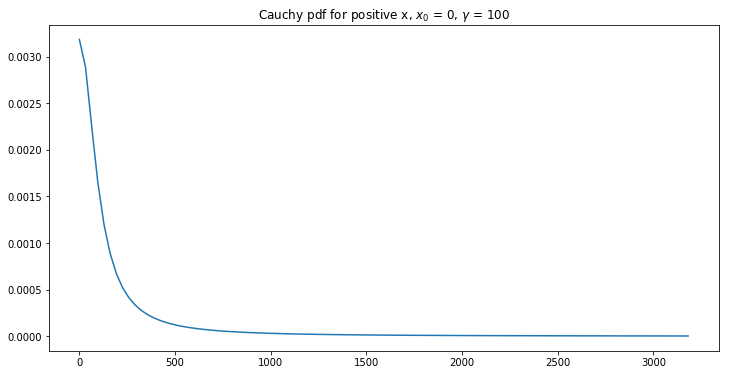

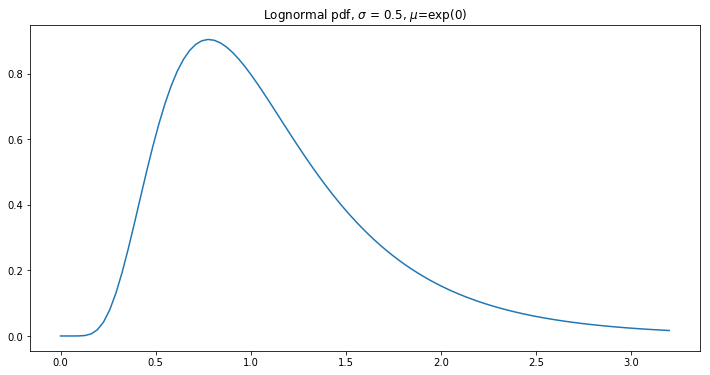

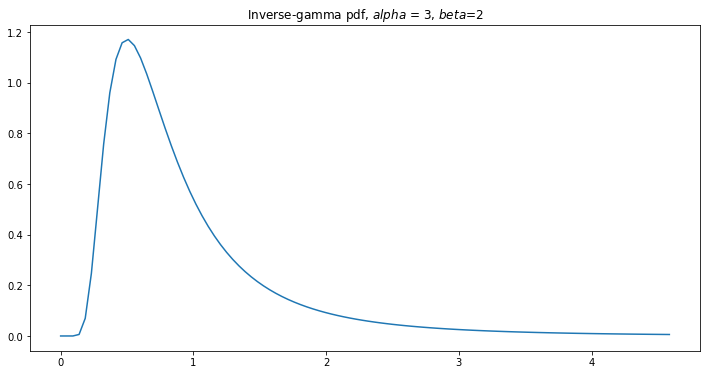

In [15]:
'''
Visualizing prior pdfs.
'''

# Cauchy prior
base_price_prior = sts.cauchy(0, 100)
plt.figure(figsize=(12, 6))
x = np.linspace(0,base_price_prior.ppf(0.99), 100)
plt.plot(x, base_price_prior.pdf(x))
plt.title("Cauchy pdf for positive x, $x_0$ = 0, $\gamma$ = 100")
plt.show()

# Lognormal prior
multiplier_prior = sts.lognorm(s=0.5, scale=np.exp(0))
plt.figure(figsize=(12, 6))
x = np.linspace(0, multiplier_prior.ppf(0.99), 100)
plt.plot(x, multiplier_prior.pdf(x))
plt.title("Lognormal pdf, $\sigma$ = 0.5, $\mu$=exp(0)")
plt.show()

# Inverse-Gamma prior
error_prior = sts.invgamma(a=3, scale=2)
plt.figure(figsize=(12, 6))
x = np.linspace(0,error_prior.ppf(0.99), 100)
plt.plot(x, error_prior.pdf(x))
plt.title("Inverse-gamma pdf, $alpha$ = 3, $beta$=2")
plt.show()

In [16]:
'''
Statistical Modeling section.
'''

stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    int<lower=0> n_data;                         // number of data
    int<lower=0> n_products;                     // number of products
    int<lower=0> n_prod_brands;                  // number of product brands
    int<lower=0> n_store_brands;                 // number of store brands
    int<lower=0> n_neighborhoods;                // number of neighborhoods
    int<lower=1> product_id[n_data];             // product ids 
    int<lower=0> product_brand_id[n_data];       // product brand ids - <lower=0> to allow for "no brand" with ID 0
    int<lower=1> neighborhood_id[n_data];        // neighborhood ids
    int<lower=1> store_id[n_data];               // store brand ids
    real<lower=0> prices[n_data];                // prices
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.
parameters {
    real<lower=0> base_price[n_products];                    // base price of the product
    real<lower=0> brand_multiplier[n_prod_brands];           // product brand multiplier
    real<lower=0> store_multiplier[n_store_brands];          // store brande multiplier
    real<lower=0> neighborhood_multiplier[n_neighborhoods];  // neighborhood multiplier
    real<lower=0> error_term;                                // standard deviation of the normal likelihood function
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
 
    // Priors
    base_price ~ cauchy(0, 100);
    brand_multiplier ~ lognormal(0, 0.5);
    store_multiplier ~ lognormal(0, 0.5);
    neighborhood_multiplier ~ lognormal(0, 0.5);
    error_term ~ inv_gamma(3, 2);

    // Price Model
    for (i in 1:n_data) {
    
        // If the product brand is known
        if (product_brand_id[i] != 0) {
            prices[i] ~ normal(base_price[product_id[i]]*\
                               brand_multiplier[product_brand_id[i]]*\
                               store_multiplier[store_id[i]]*\
                               neighborhood_multiplier[neighborhood_id[i]], error_term);
        }
    
        // If the product brand is unknown
        else {
            prices[i] ~ normal(base_price[product_id[i]]*\
                               store_multiplier[store_id[i]]*\
                               neighborhood_multiplier[neighborhood_id[i]], error_term);
        
        }
    }
}

"""

stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b2558560db82e954438363cf1fb6783a NOW.


In [17]:
stan_data = {
    "n_data" : df.shape[0],
    "n_products" : len(df["Product"].unique()),
    "n_prod_brands" : len(df["Product_Brand"].unique()) - 1,  # -1 to disconsider "no brand" as a multiplier
    "n_store_brands" : len(df["Store_Brand"].unique()),
    "n_neighborhoods" : len(df["Neighborhood"].unique()),
    "product_id" : df["Product"].values,
    "product_brand_id" : df["Product_Brand"].values,
    "neighborhood_id" : df["Neighborhood"].values,
    "store_id" : df["Store_Brand"].values,
    "prices" : df["Product_Price"].values
    }

In [18]:
results = stan_model.sampling(data=stan_data)
print(results)

Inference for Stan model: anon_model_b2558560db82e954438363cf1fb6783a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base_price[1]                 4.21    0.06   1.22   2.32   3.33   4.03   4.87   7.16    397   1.01
base_price[2]                 2.43    0.04   0.72    1.3   1.91   2.32   2.82   4.12    406   1.01
base_price[3]                 5.87    0.09   1.68   3.26   4.68   5.61   6.83   9.84    384   1.01
base_price[4]                 2.42    0.04   0.72   1.32   1.92   2.32    2.8   4.09    401   1.01
base_price[5]                 2.25    0.03   0.68    1.2   1.76   2.14   2.62   3.85    432   1.01
base_price[6]                 4.85    0.07   1.42   2.67   3.83   4.65   5.68   8.29    391   1.01
base_price[7]                 2.05    0.03   0.62   1.09   1.61   1.96   2.41    3.6    426   1.01
base_price[8]      

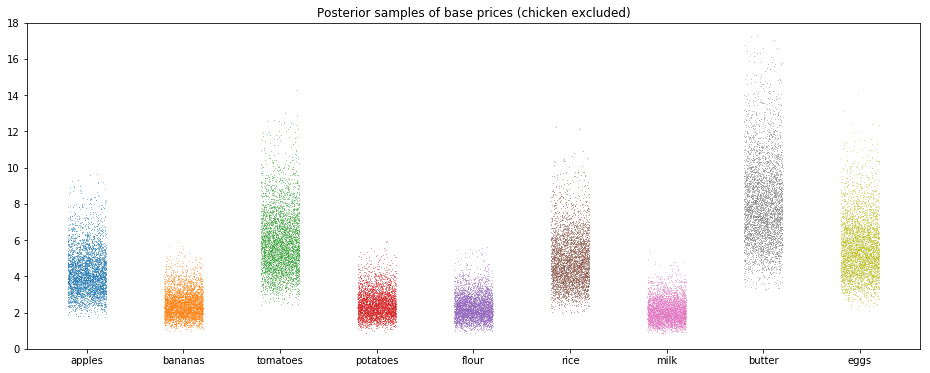

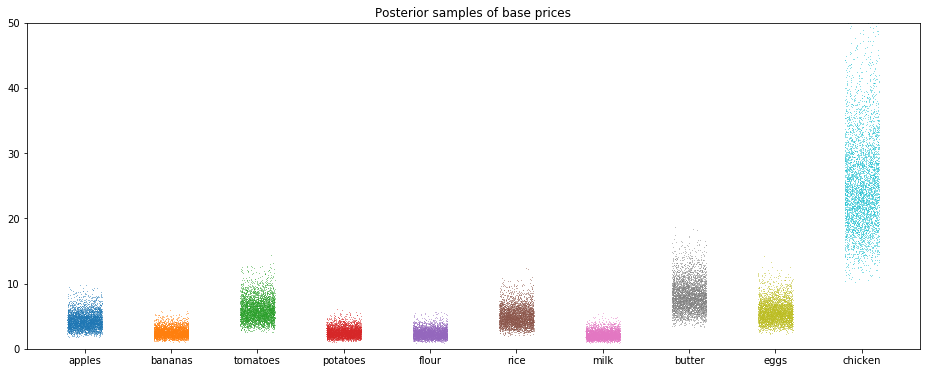

In [29]:
# Extracting samples
samples = results.extract()

# Plotting posterior base prices (chicken excluded)
plt.figure(figsize=(16,6))
for i in range(len(df["Product"].unique()) - 1):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['base_price'][:,i], ',', alpha=0.5)
plt.title('Posterior samples of base prices (chicken excluded)')
plt.xticks(range(1, len(df["Product"].unique())), list(mapper['Product'].values()))
plt.ylim(0, 18)
plt.show()

# Plotting posterior base prices
plt.figure(figsize=(16,6))
for i in range(len(df["Product"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['base_price'][:,i], ',', alpha=0.5)
plt.title('Posterior samples of base prices')
plt.xticks(range(1, 1+ len(df["Product"].unique())), list(mapper['Product'].values()))
plt.ylim(0, 50)
plt.show()


### What is the basic average price for each product?

In [20]:
print("The basic average price of each product is...")

base_prices = pd.DataFrame({'Average Price':samples["base_price"].mean(axis=0),
                            'Product':list(mapper["Product"].values())})
display(base_prices[["Product", "Average Price"]].round(2))

The basic average price of each product is...


,Product,Average Price
0,apples,4.21
1,bananas,2.43
2,tomatoes,5.87
3,potatoes,2.42
4,flour,2.25
5,rice,4.85
6,milk,2.05
7,butter,8.03
8,eggs,5.55
9,chicken,25.35


We should note that the prices shown above are *not* the average prices that one would expect to actually *observe* in a store. The difference is that these are posterior sample means for the base price of these products, whereas the prices we actually observe should take the multipliers below into account and should be sampled from a posterior predictive distribution. One underlying reason for the difference between base and expected prices is that nothing in the model above guarantees that the posterior distribution of a category of multipliers will be centered around one. Hence, our base prices could be particularly high if our multipliers are reasonably below 1, which happens to be the case for both the neighborhood and store brand multipliers.

### How much does each of the following factors modify the basic price of the product (up or down)?

#### Neighborhood of the grocery store

We can see in the graph below that the Prenzlauer Berg neighborhood seems to be the cheapest in Berlin, whereas Tempelholf the most expensive. We should also note that most of the multipliers are between 0.7 and 1, driving the price down. Tempelholf is the only neighborhood with a posterior sample mean larger than 1.

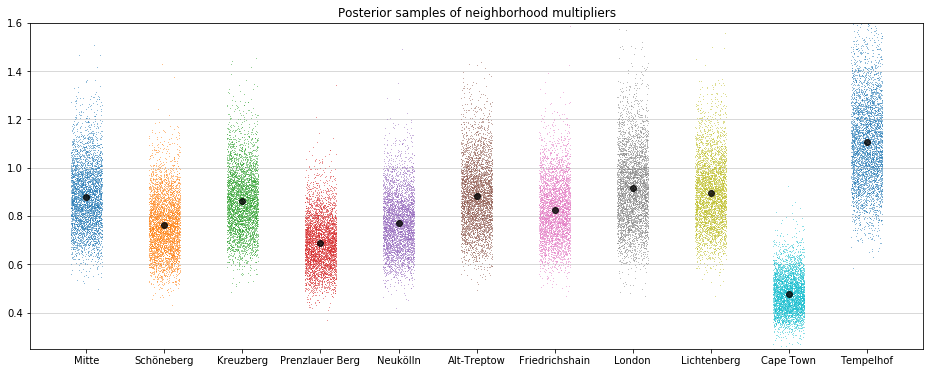

In [21]:
# Plotting posterior neighborhood multipliers
plt.figure(figsize=(16,6))
for i in range(len(df["Neighborhood"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['neighborhood_multiplier'][:,i], ',', alpha=0.5)
plt.plot(range(1, 1 + len(df["Neighborhood"].unique())),samples['neighborhood_multiplier'].mean(axis=0), 
         marker='.', linewidth=0,color="black", alpha=0.8, markersize=12)
plt.title('Posterior samples of neighborhood multipliers')
plt.xticks(list(mapper['Neighborhood'].keys()), list(mapper['Neighborhood'].values()))
plt.ylim(0.25, 1.6)
plt.grid(True, alpha=0.6, axis='y')
plt.show()

#### Brand of the product

In the graph below, posterior samples of 11 brand multipliers, representing the deciles in the distribution of posterior sample means, are plotted. The brand "plain" seems to be an outlier with the highest posterior sample mean. 70% of the brand multipliers have posterior means above 1, indicating that most brands drive the product price upward.

In [22]:
print("{:.1f}% of brand multipliers have posterior means above 1.".format(
    100*sum(samples['brand_multiplier'].mean(axis=0) > 1)/samples['brand_multiplier'].shape[1]))

70.3% of brand multipliers have posterior means above 1.


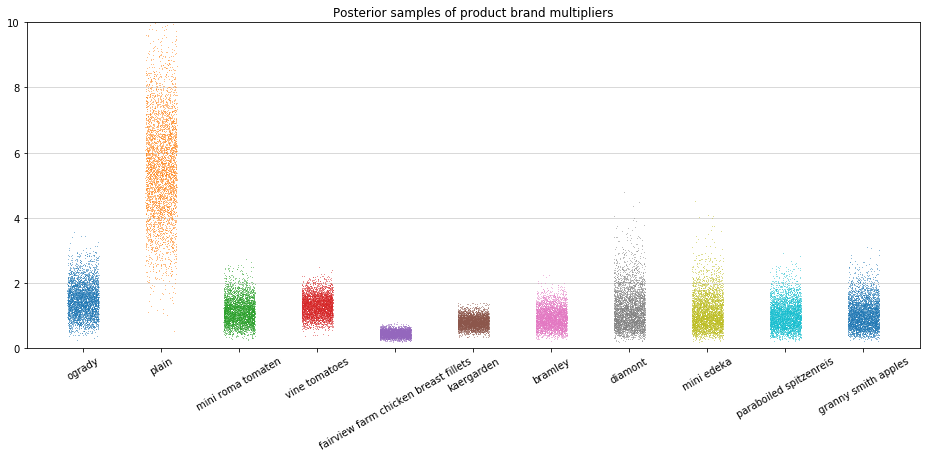

In [23]:
percentiles = np.percentile(samples['brand_multiplier'].mean(axis=0), [_*10 for _ in range(11)], interpolation='nearest')
percentile_mask = np.argwhere(np.isin(samples['brand_multiplier'].mean(axis=0), percentiles)).flatten()
np.random.shuffle(percentile_mask)

plt.figure(figsize=(16,6))
for i, brand in enumerate(percentile_mask):
    plt.plot(sts.uniform.rvs(loc=i+1-0.2, scale=0.4, size=4000), samples['brand_multiplier'][:,brand], ',', alpha=0.5)
plt.title('Posterior samples of product brand multipliers')
plt.xticks(range(1, 1+len(percentile_mask)), 
           pd.Series(mapper['Product_Brand'])[percentile_mask].values, rotation=30)
plt.grid(True, alpha=0.6, axis='y')
plt.ylim(0, 10)
plt.show()

#### Brand of the grocery store

We now plot the posterior samples for the grocery store multipliers. Lidl stands out as the cheapest store, whereas the other stores have posterior sample distributions quite alike. The posterior mean of Lidl's multipliers lies around 0.4, whereas the other stores' are close to 0.6. Hence, the store brand multipliers are also bringing the price down in this model. 

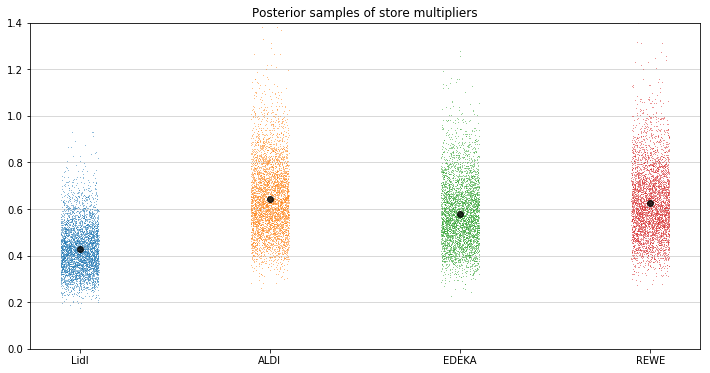

In [24]:
# Plotting posterior neighborhood multipliers
plt.figure(figsize=(12,6))
for i in range(len(df["Store_Brand"].unique())):
    plt.plot(sts.uniform.rvs(loc=i+1-0.1, scale=0.2, size=4000), samples['store_multiplier'][:,i], ',', alpha=0.5)
plt.plot(range(1, 1 + len(df["Store_Brand"].unique())),samples['store_multiplier'].mean(axis=0), 
         marker='.', linewidth=0,color="black", alpha=0.8, markersize=12)
plt.title('Posterior samples of store multipliers')
plt.xticks(list(mapper['Store_Brand'].keys()), list(mapper['Store_Brand'].values()))
plt.grid(True, alpha=0.6, axis='y')
plt.ylim(0, 1.4)
plt.show()

Based on the three set of multipliers plotted above above, the strongest effect stem from the store multipliers (which may cut down the price by half). Both the product brand and neighborhood multipliers have more meager effects, the former multipliers usually bringing the price up and the latter bringing it down. 

### Does price variation by geographical location correlate with variation in real estate prices in Berlin, or not?

There is a slight negative correlation. Therefore, our model indicates that we would expect, *ceteris paribus*, to observe lower product prices in more expensive neighborhoods. The correlation is, however, barely existent. Our data set may be too small to allow for reasonable inference. We see the decoupling of real estate prices and the multipliers in the Mitte and Tempelhof neighborhoods. Real Estate prices in Tempelhof are close to half of those in Mitte, whereas the latter neighborhood has a mean multiplier lower than that of the former.


In [35]:
# I have done the analysis on real estate data rather than rental prices.
# Source: https://guthmann-estate.com/marketreport/real-estate-report/
rental_prices = [6400, 5000, 5100, 4200, 3200, 4200, 3200, 3700, 3600]

multipliers = pd.DataFrame({
    "Neighborhood":list(mapper['Neighborhood'].values()), 
    "Mean Multiplier":samples['neighborhood_multiplier'].mean(axis=0)}).\
                        round(2).drop([7,9], axis=0).reset_index(drop=True)

price_variation = pd.concat([multipliers, pd.DataFrame({"Real Estate Prices":rental_prices})], axis=1)
    
display(price_variation)
cor = sts.pearsonr(price_variation["Mean Multiplier"],price_variation["Real Estate Prices"])[0]
print("Real estate prices and mean posterior neighborhood multipliers have a Pearson correlation coefficient of {:.2f}.".\
      format(cor))

,Mean Multiplier,Neighborhood,Real Estate Prices
0,0.88,Mitte,6400
1,0.76,Schöneberg,5000
2,0.86,Kreuzberg,5100
3,0.69,Prenzlauer Berg,4200
4,0.77,Neukölln,3200
5,0.88,Alt-Treptow,4200
6,0.83,Friedrichshain,3200
7,0.89,Lichtenberg,3700
8,1.11,Tempelhof,3600


Real estate prices and mean posterior neighborhood multipliers have a Pearson correlation coefficient of -0.08.
